# Helmholtz equation

We present a differentiable solver for the Helmholtz equation, based on `torch-harmonics`. 

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from math import ceil

import sys

from torch_harmonics.sht import *
from torch_harmonics.examples import SphereSolver

cmap='twilight_shifted'

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

We define a shallow water solver class in `shallow_water_equations.py`

In [4]:
# initialize parameters:
nlat = 128
nlon = 2*nlat
lmax = ceil(nlon/4)
mmax = lmax

# timestepping
dt = 0.001
maxiter = int(10 / dt)

# initialize solver class
solver = SphereSolver(nlat, nlon, dt, lmax=lmax, mmax=mmax, coeff=0.01).to(device)

lons = solver.lons
lats = solver.lats

jj, ii = torch.triu_indices(lmax, mmax)


In [5]:
# def compute_initial_condition(solver, device=torch.device('cpu')):
#     """
#     Computes the initial condition
#     """

#     lats, lons = torch.meshgrid(solver.lats, solver.lons)

#     u0 = torch.zeros(nlat, nlon)
#     u0 = torch.sin(lats) * torch.cos(3 * lons)
#     u0spec = solver.grid2spec(u0)

#     return torch.tril(u0spec)

# uspec0 = compute_initial_condition(solver, device=device)

# solver.plot_specdata(uspec0, title='Initial condition t=0', vmax=1., vmin=-1.)
# plt.show()

preparing the simulation

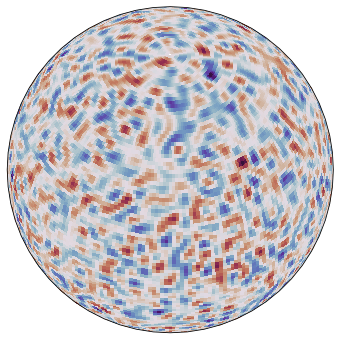

In [6]:
uspec0 = solver.randspec()
fig = plt.figure(figsize=(8, 6), dpi=72)
solver.plot_specdata(uspec0, fig, cmap=cmap)
plt.show()

t=0.00
t=0.02
t=0.04
t=0.06
t=0.08
t=0.10
t=0.12
t=0.14
t=0.16
t=0.18
t=0.20
t=0.22
t=0.24
t=0.26
t=0.28
t=0.30
t=0.32
t=0.34
t=0.36
t=0.38
t=0.40
t=0.42
t=0.44
t=0.46
t=0.48
t=0.50
t=0.52
t=0.54
t=0.56
t=0.58
t=0.60
t=0.62
t=0.64
t=0.66
t=0.68
t=0.70
t=0.72
t=0.74
t=0.76
t=0.78
t=0.80
t=0.82
t=0.84
t=0.86
t=0.88
t=0.90
t=0.92
t=0.94
t=0.96
t=0.98
t=1.00
t=1.02
t=1.04
t=1.06
t=1.08
t=1.10
t=1.12
t=1.14
t=1.16
t=1.18
t=1.20
t=1.22
t=1.24
t=1.26
t=1.28
t=1.30
t=1.32
t=1.34
t=1.36
t=1.38
t=1.40
t=1.42
t=1.44
t=1.46
t=1.48
t=1.50
t=1.52
t=1.54
t=1.56
t=1.58
t=1.60
t=1.62
t=1.64
t=1.66
t=1.68
t=1.70
t=1.72
t=1.74
t=1.76
t=1.78
t=1.80
t=1.82
t=1.84
t=1.86
t=1.88
t=1.90
t=1.92
t=1.94
t=1.96
t=1.98
t=2.00
t=2.02
t=2.04
t=2.06
t=2.08
t=2.10
t=2.12
t=2.14
t=2.16
t=2.18
t=2.20
t=2.22
t=2.24
t=2.26
t=2.28
t=2.30
t=2.32
t=2.34
t=2.36
t=2.38
t=2.40
t=2.42
t=2.44
t=2.46
t=2.48
t=2.50
t=2.52
t=2.54
t=2.56
t=2.58
t=2.60
t=2.62
t=2.64
t=2.66
t=2.68
t=2.70
t=2.72
t=2.74
t=2.76
t=2.78
t=2.80
t=2.82
t=2.84

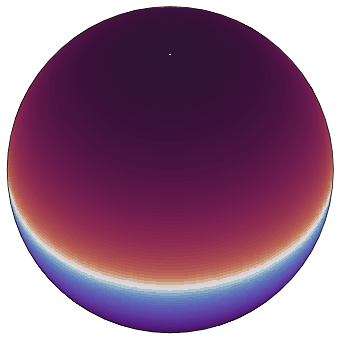

In [7]:
dudtspec = torch.zeros(3, solver.lmax, solver.mmax, dtype=torch.complex128, device=device)
nnew = 0
nnow = 1
nold = 2

uspec = uspec0.clone().to(device)
# pde = 'allen-cahn'
pde = 'ginzburg-landau'


# prepare figure for animation
fig = plt.figure(figsize=(8, 6), dpi=72)
moviewriter = animation.writers['pillow'](fps=20)
moviewriter.setup(fig, pde+'.gif', dpi=72)


with torch.no_grad():
    for iter in range(maxiter+1):
        t = iter*dt

        if iter % 20 == 0:
            print(f"t={t:.2f}")
            plt.clf()
            solver.plot_specdata(uspec, fig, cmap=cmap)
            plt.draw()
            moviewriter.grab_frame()

        dudtspec[nnew] = solver.dudtspec(uspec, pde=pde)
        
        # forward euler, then 2nd-order adams-bashforth time steps to start.
        if iter == 0:
            dudtspec[nnow] = dudtspec[nnew]
            dudtspec[nold] = dudtspec[nnew]
        elif iter == 1:
            dudtspec[nold] = dudtspec[nnew]

        uspec = uspec + solver.dt*( (23./12.) * dudtspec[nnew] - (16./12.) * dudtspec[nnow] + (5./12.) * dudtspec[nold] )

        # implicit hyperdiffusion for vort and div.
        # uspec[1:] = swe_solver.hyperdiff * uspec[1:]
        # switch indices, do next time step.
        nsav1 = nnew
        nsav2 = nnow
        nnew = nold
        nnow = nsav1
        nold = nsav2


moviewriter.finish()